# Bienvenido a tu primer competencia de ciencia de datos!!!

En este notebook desarrollaremos el problema del Titanic. Este dataset es el más popular entre todos los que quieren iniciar en este mundo de la Ciencia de Datos. Buscamos predecir si un pasajero, con ciertas caractéristicas, sobrevivió o no a esta tragedia ocurrida en el siglo 20.


![](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png)

En este caso, tenemos dos tablas de datos: train y summit (test.csv). Ahora, esta data ha sido sacada de una **competencia de Kaggle** Por eso, la data que nombraremos como **summit contendrá la base para poder aplicar nuestro modelo ya completado**. El mismo Kaggle se encargará de saber si es un buen modelo o no. Posteriormente, esta tabla nombrada **train nos servirá tanto para entrenar como para testear nuestrso modelos**.
El link de la competencia es: https://www.kaggle.com/c/titanic

In [1]:
"CELDA N°01"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Usualmente salen advertencias de actualizaciones pasadas de las librerías, las ignoramos por ahora...
import warnings
warnings.filterwarnings('ignore')

In [2]:
"CELDA N°02"
#Importamos dos dataset para esta competencia el train y summit
train = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/train_preproc_titanic.csv')
summit = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/summit_preproc_titanic.csv')

En cada **competencia** de Ciencia de Datos se presenta al concursante un conjunto de datos **sin target** exclusivamente con el objetivo de completar este dato faltante. Por lo tanto este conjunto de datos denominado **summit** no se utiliza en el entrenamiento.

##**Partición de la data para entrenamiento**

In [3]:
"CELDA N°03"
#Denominamos a las variables predictoras X mientras que el target se denomina Y
X = train.drop('Sobrevivio',axis=1)
y = train['Sobrevivio']

In [4]:
"CELDA N°04"
#Realizamos la división de ambas variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.15,random_state=1) #Separa el 15% de la data para generar las predicciones

In [5]:
"CELDA N°05"
#Mostramos con el parámetro shape la cantidad de filas que resultaron en cada parte
print('Para el X_train:', X_train.shape, 'y para el y_train',y_train.shape)
print('Para el X_test:',X_test.shape,'y para el y_test',y_test.shape)

Para el X_train: (757, 7) y para el y_train (757,)
Para el X_test: (134, 7) y para el y_test (134,)


##**Modelo de Regresión Logística**

In [6]:
"CELDA N°06"
from sklearn.linear_model import LogisticRegression #Importamos la librería para aplicar Regresión Logística
rl = LogisticRegression(random_state=1) #creamos la variable rl para guardar el modelo con los parámetros deseados
rl.fit(X_train, y_train) #entrenamos con datos guardados en X_train, y_train
rl_pred = rl.predict(X_test) #generamos las predicciones usando como variables predictoras los datos en X_test
rl_pred #mostramos las predicciones guardadas en la variable rl_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0])

###*Probabilidades de la predicción sobre el target*

In [7]:
"CELDA N°07"
#Calculamos la probabilidades de obtener 1 con el método predict_proba
rl_prob = rl.predict_proba(X_test)[:, 1]
rl_prob

array([0.91729564, 0.08136309, 0.82118345, 0.72672992, 0.52482667,
       0.0826539 , 0.19232699, 0.94525274, 0.50460252, 0.8027339 ,
       0.08242648, 0.64878952, 0.34971917, 0.18026305, 0.72616848,
       0.35364663, 0.1343863 , 0.12153028, 0.0818032 , 0.63221405,
       0.08202955, 0.14262996, 0.93165645, 0.18318907, 0.43221445,
       0.08231814, 0.88020459, 0.8184411 , 0.18143172, 0.91935382,
       0.64952848, 0.35250892, 0.32647374, 0.73977099, 0.11411516,
       0.09878873, 0.35226765, 0.08292933, 0.50455385, 0.08271092,
       0.6486182 , 0.66629049, 0.92326366, 0.35068598, 0.57222651,
       0.08185386, 0.07136162, 0.18001865, 0.39785405, 0.18255087,
       0.21118137, 0.82074147, 0.18221456, 0.18031792, 0.08221043,
       0.74005545, 0.18109702, 0.34811681, 0.02301163, 0.64983199,
       0.10792254, 0.09763139, 0.25429892, 0.35073088, 0.45771161,
       0.70607247, 0.10516566, 0.09765791, 0.38939711, 0.19157263,
       0.0887176 , 0.13416234, 0.39515416, 0.0828742 , 0.81672

###*Coeficientes de la regresión logística*

In [8]:
"CELDA N°08"
#Mostramos los coeficientes de la ecuación obtenida con la Regresión Logística
coeficientes = pd.DataFrame({'variables':X_train.columns.values, 'betas': np.round(rl.coef_[0],4) })
coeficientes

,variables,betas
0,Pclass,-0.9037
1,Genero,0.7561
2,Edad,-0.7345
3,Tarifa,0.1102
4,P_embarque,0.0930
5,Miembros_de_fam,-0.3521
6,Viaja_solo,-0.7824


### *Score de la Regresión Logística*

In [9]:
"CELDA N°09"
#Calculamos el accuracy comparando las predicciones generadas versus y_test
from sklearn.metrics import accuracy_score
print('El accuracy para mi primero modelo es :{0:.2f}'.format(accuracy_score(y_test,rl_pred))) #usando la expresión regex .2f para mostrar 2 decimales

El accuracy para mi primero modelo es :0.81


##**Modelo de Random Forest**

In [10]:
"CELDA N°10"
from sklearn.ensemble import RandomForestClassifier #Importamos la librería para aplicar Random Forest
rf = RandomForestClassifier(n_jobs = -1,max_depth=3,random_state=1) #creamos la variable rf para guardar el modelo con los parámetros deseados
rf.fit(X_train,y_train) #entrenamos con datos guardados en X_train, y_train
rf_pred = rf.predict(X_test) #generamos las predicciones usando como variables predictoras los datos en X_test
rf_pred #mostramos las predicciones guardadas en la variable rf_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0])

###*Probabilidades de la predicción sobre el target*

In [11]:
"CELDA N°11"
#Calculamos la probabilidades de obtener 1 con el método predict_proba
rf_prob = rf.predict_proba(X_test)[:,1]
rf_prob

array([0.69465895, 0.13337178, 0.67802702, 0.50155757, 0.76835726,
       0.14386919, 0.29446013, 0.78434366, 0.44397844, 0.51947329,
       0.14384053, 0.4690178 , 0.34583404, 0.20163781, 0.4958344 ,
       0.31982706, 0.29951416, 0.19535978, 0.13865481, 0.62105297,
       0.14730453, 0.23317542, 0.74794057, 0.33379392, 0.5608061 ,
       0.14401847, 0.74539018, 0.67221131, 0.20209061, 0.79797678,
       0.50277966, 0.33208328, 0.34176073, 0.47715593, 0.13677452,
       0.33570822, 0.32129416, 0.1514982 , 0.4442548 , 0.14386919,
       0.4690178 , 0.51560113, 0.78178604, 0.31927439, 0.82129528,
       0.14097119, 0.31228099, 0.19995084, 0.4332765 , 0.21311058,
       0.22341113, 0.6631544 , 0.19938148, 0.20163781, 0.1408029 ,
       0.51889774, 0.20209061, 0.31513242, 0.15492273, 0.45450747,
       0.37210996, 0.17388628, 0.32022727, 0.31688296, 0.3949033 ,
       0.55063424, 0.23532595, 0.19927645, 0.57059351, 0.29633703,
       0.20904844, 0.3158416 , 0.42887044, 0.14366423, 0.67548

###*Importancia de variables*

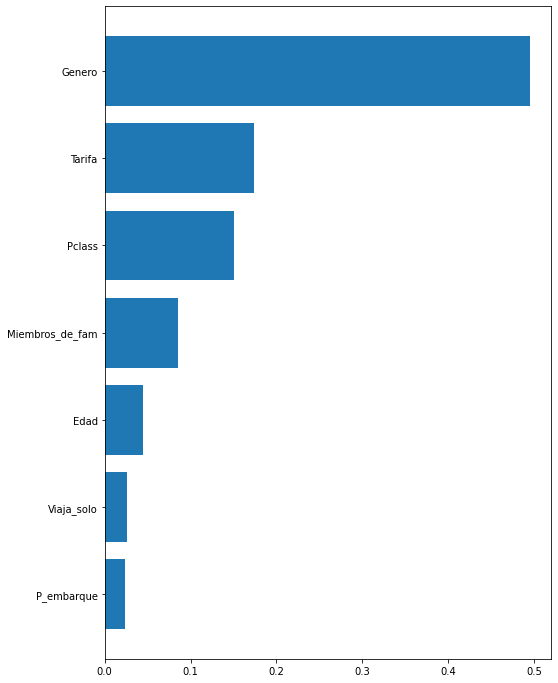

In [12]:
"CELDA N°12"
#Graficamos la importancia de cada variable con gráfica de barras usando el método feature_importances_
pesos = rf.feature_importances_
cols = X_train.columns
plt.figure(figsize=(8,12))
indices = np.argsort(pesos)
plt.barh(range(len(indices)), pesos[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.show()

### *Score del Random Forest*

In [13]:
"CELDA N°13"
#Calculamos el accuracy comparando las predicciones generadas versus y_test
print('El accuracy para mi tercer modelo es :{0:.2f}'.format(accuracy_score(y_test,rf_pred))) #usando la expresión regex .2f para mostrar 2 decimales

El accuracy para mi tercer modelo es :0.77


## **Matriz de Confusión**

### *Matriz de Confusión de la Regresión Logística*

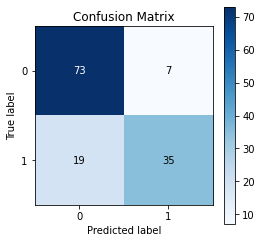

In [14]:
"CELDA N°14"
!pip install -q scikit-plot #Instalamos en el presente notebook usando ! el paquete scikit-plot
import scikitplot as skplt #Importamos la librería skplt
skplt.metrics.plot_confusion_matrix(y_test,rl_pred, figsize=(4,4)) #Graficamos la matriz usando plot_confusion_matrix y los datos de y_test vs rl_pred

In [15]:
"CELDA N°15"
from sklearn.metrics import classification_report #Importamos la librería classification_report
rl_report = classification_report(y_test, rl_pred, target_names=['0' , '1']) #Obtenemos las mátricas de la matriz por Regresión Logística
print(rl_report)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        80
           1       0.83      0.65      0.73        54

    accuracy                           0.81       134
   macro avg       0.81      0.78      0.79       134
weighted avg       0.81      0.81      0.80       134



### *Matriz de Confusión de Random Forest*

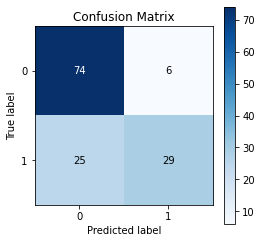

In [16]:
"CELDA N°16"
skplt.metrics.plot_confusion_matrix(y_test,rf_pred, figsize=(4,4)) #Graficamos la matriz usando plot_confusion_matrix y los datos de y_test vs rf_pred

In [17]:
"CELDA N°17"
rf_report = classification_report(y_test, rf_pred, target_names=['0' , '1']) #Obtenemos las mátricas de la matriz por Random Forest
print(rf_report)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        80
           1       0.83      0.54      0.65        54

    accuracy                           0.77       134
   macro avg       0.79      0.73      0.74       134
weighted avg       0.78      0.77      0.76       134



##**Curva ROC**

### *Parámetros de la curva ROC*

In [18]:
"CELDA N°18"
from sklearn.metrics import roc_curve, roc_auc_score #Importamos las librerías necesarias para dibujar las curvas ROC
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, rl_prob) #Obtenemos las métricas de la curva ROC usando y_test vs rl_prob
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, rf_prob) #Obtenemos las métricas de la curva ROC usando y_test vs rf_prob
print('roc_auc_score Regresión Logística: ', roc_auc_score(y_test, rl_prob))
print('roc_auc_score Random Forest: ', roc_auc_score(y_test, rf_prob))

roc_auc_score Regresión Logística:  0.8266203703703704
roc_auc_score Random Forest:  0.8380787037037037


###*Gráfica de la curva ROC*

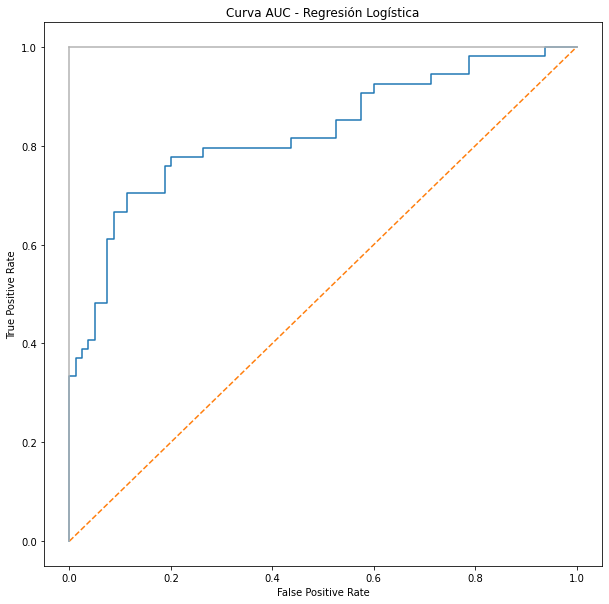

In [19]:
"CELDA N°19"
#Dibujamos la curva ROC con las métricas obtenidas para Regresión Logística
plt.subplots(1, figsize=(10,10))
plt.title('Curva AUC - Regresión Logística')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

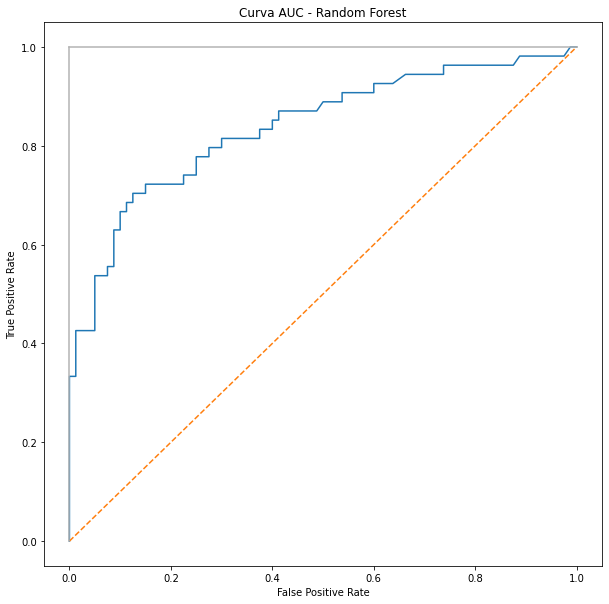

In [20]:
"CELDA N°20"
#Dibujamos la curva ROC con las métricas obtenidas para Random Forest
plt.subplots(1, figsize=(10,10))
plt.title('Curva AUC - Random Forest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()